# SVM :Suport Vector Machine

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Create dataset

In [3]:
X = torch.randn(100,2)
y = torch.where(X[:,0]> X[:,1],1 ,-1).float()       #-1/1

#print(X,y)

In [5]:
dataset = TensorDataset(X,y)
loader = DataLoader(dataset, batch_size=10)

## Define Model

In [4]:
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)

    def forward(self,x):
        return self.linear(x)
    
model = SVM()
criterion = nn.HingeEmbeddingLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## Train

In [7]:
n_epochs =100
for epoch in range(n_epochs):
    for inputs, labels in loader:
        #forward
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #print
    if (epoch+1)%10 ==0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.3f}")
        

Epoch [10/100], Loss: -0.121
Epoch [20/100], Loss: -0.423
Epoch [30/100], Loss: -0.708
Epoch [40/100], Loss: -0.991
Epoch [50/100], Loss: -1.271
Epoch [60/100], Loss: -1.547
Epoch [70/100], Loss: -1.820
Epoch [80/100], Loss: -2.093
Epoch [90/100], Loss: -2.366
Epoch [100/100], Loss: -2.640


## visualzie

In [8]:
import matplotlib.pyplot as plt
import numpy as np

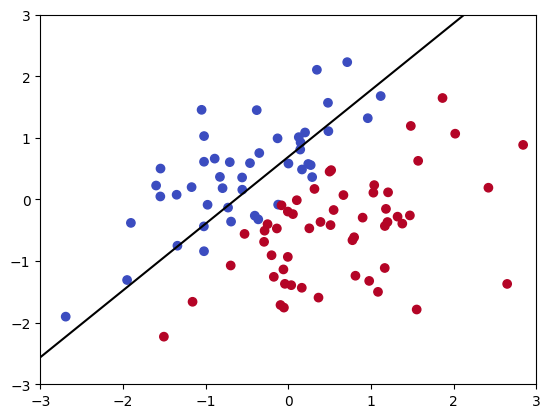

In [10]:
# 결정 경계 시각화

w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

 

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# SVM: detect Outlier
: one_class

In [11]:
from sklearn.datasets import make_moons
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

In [12]:
"""
make-moons함수를 사용해 2차원 평면의 두 개 반원 데이터 셋 생성
하나의 반원은 outlier로 설정
"""

'\nmake-moons함수를 사용해 2차원 평면의 두 개 반원 데이터 셋 생성\n하나의 반원은 outlier로 설정\n'

## create data

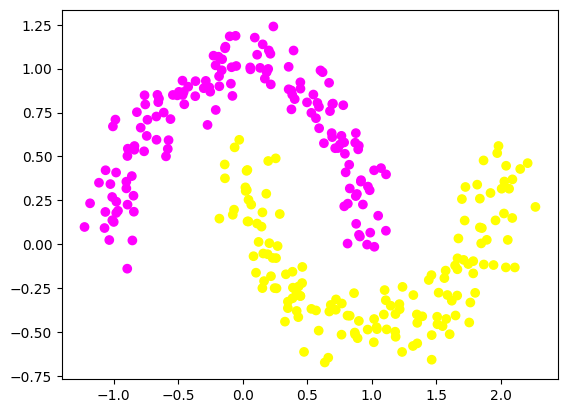

In [18]:
X,y = make_moons(n_samples=300, noise=0.1, random_state=42)

#visualzie
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.spring)
plt.show()

In [33]:
# pink : 0
# yellow: 1

In [37]:
print(X)

[[ 1.39329067e-01 -8.75676417e-01]
 [ 1.50201998e+00 -6.18307322e-01]
 [-6.86251332e-01  8.78145024e-02]
 [ 3.42788753e-01 -1.14680018e-01]
 [ 6.40523866e-01 -1.05944380e+00]
 [ 4.76709954e-01 -9.72390743e-01]
 [-1.55311360e-01 -7.57485057e-01]
 [-1.10833666e+00  3.99048320e-01]
 [ 3.58939998e-01 -3.94729502e-01]
 [-3.38555540e-01 -4.52234760e-01]
 [ 7.82075698e-01 -8.08164643e-01]
 [-1.60933578e-01  5.66686040e-01]
 [ 4.26450388e-01 -1.04471519e+00]
 [ 1.26196582e-01  6.48065513e-01]
 [-4.22384289e-01 -4.43406862e-01]
 [ 4.74276678e-01 -1.13169202e+00]
 [ 1.46921598e+00 -7.84192723e-02]
 [ 1.78054408e-01 -9.08653941e-01]
 [-1.40501498e+00 -4.33430038e-01]
 [-3.62701249e-01 -1.12924524e-01]
 [-5.96690854e-01  7.63210346e-01]
 [-1.38967194e+00  1.88742968e-01]
 [ 9.69601024e-01 -1.00811240e+00]
 [ 9.67349612e-01 -9.56620447e-01]
 [-1.31015235e+00  5.62645529e-01]
 [ 4.74355356e-02  4.82916659e-01]
 [ 1.29986405e+00 -3.43986103e-01]
 [ 1.61389816e+00  5.67580520e-02]
 [-4.79960470e-01 -1

## Detact outliers

In [19]:
len(X)


300

In [26]:
# set outliers size
outliers_ratio = 0.1
n_outliers = int(outliers_ratio *len(X))
n_inliners = len(X) - n_outliers
print(n_outliers, n_inliners)

33 297


In [21]:
# 난수 생성
rng = np.random.RandomState(42)

# 이상치 데이터 생성
X_outliers = 1.5*rng.uniform(low=-1, high=3, size=(n_outliers,2))
#왜 (,2)??????

X = np.vstack([X, X_outliers])
y = np.hstack([y, -1*np.ones(n_outliers)])

In [24]:
X_outliers.shape

(30, 2)

In [29]:
#정규화
X = (X-X.mean(axis=0))/ X.std(axis=0)

#split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## Train

In [30]:
model = OneClassSVM(nu = 0.05, kernel='rbf', gamma='auto')
model.fit(X_train)

OneClassSVM(gamma='auto', nu=0.05)

Detact outlier

In [31]:
y_pred = model.predict(X_test)
#1 ->0/ -1->1
y_pred = np.where(y_pred==1,0,y_pred)

score = f1_score(y_test, y_pred, average='macro')
print(score)

0.47853535353535354


In [ ]:
#??????!?!?!?!!!!!!